--- Random Forest Results ---
              precision    recall  f1-score   support

        Term       0.80      0.94      0.86       245
     Preterm       0.84      0.57      0.68       134

    accuracy                           0.81       379
   macro avg       0.82      0.76      0.77       379
weighted avg       0.81      0.81      0.80       379



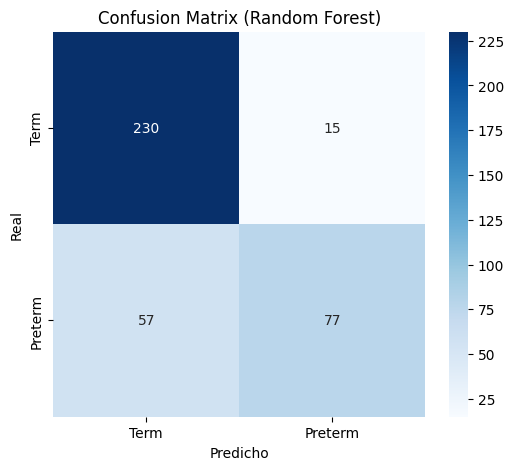


--- Top 10 Bacterias Predictoras ---
                     Bacteria  Importance
1050  Lactobacillus crispatus    0.021826
1063   Lactobacillus jensenii    0.018026
2075                Weissella    0.017833
1062      Lactobacillus iners    0.017628
823                Firmicutes    0.014838
1975      Terrabacteria group    0.014067
253       Bacteria <bacteria>    0.012932
1451      Peptoniphilus harei    0.011904
1040            Lactobacillus    0.011731
1080  Lactobacillus vaginalis    0.011269


C:\Users\Emiliano\AppData\Local\Temp\ipykernel_22924\2656909183.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Bacteria', data=top_10_bacteria, palette='viridis')


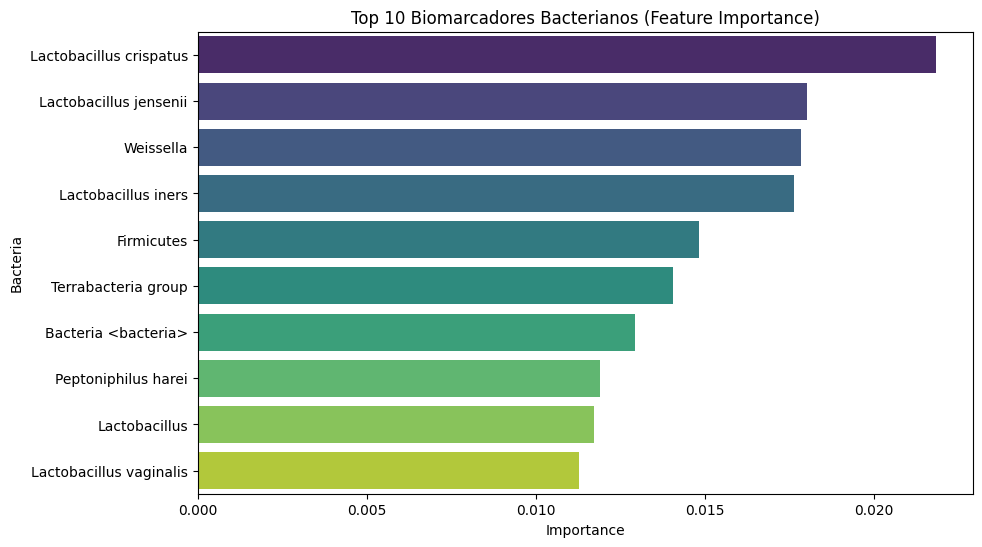

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

meta_path = r'C:\Users\Emiliano\Desktop\CodigosTesis\Training\Training\metadata\metadata.csv'
taxa_path = r'C:\Users\Emiliano\Desktop\CodigosTesis\Training\Training\taxonomy\taxonomy_relabd.species.csv'

metadata = pd.read_csv(meta_path)
taxonomy = pd.read_csv(taxa_path)


meta_subset = metadata[['specimen', 'was_preterm']].copy()


full_data = pd.merge(meta_subset, taxonomy, on='specimen')


X = full_data.drop(columns=['specimen', 'was_preterm'])
y = full_data['was_preterm'].astype(int) 


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1] 


print("--- Random Forest Results ---")
print(classification_report(y_test, y_pred, target_names=['Term', 'Preterm']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Term', 'Preterm'], yticklabels=['Term', 'Preterm'])
plt.title('Confusion Matrix (Random Forest)')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

importances = rf_model.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Bacteria': feature_names, 'Importance': importances})
top_10_bacteria = feature_imp_df.sort_values(by='Importance', ascending=False).head(10)

print("\n--- Top 10 Bacterias Predictoras ---")
print(top_10_bacteria)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Bacteria', data=top_10_bacteria, palette='viridis')
plt.title('Top 10 Biomarcadores Bacterianos (Feature Importance)')
plt.show()